# Penentuan Kelayakan Konsumen Ahsana Property dalam Menerima Pembiayaan Menggunakan Algoritma SOM

In [ ]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=de7515562b979ae85b90d3e06e7b49a845a08f90d0d06e2d8617dfd7618008af
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/kpr.csv')
X=df.iloc[:,:-1].values  # Predictor attributes
Y=df.iloc[:,-1].values   # Target attribute
df.head(614)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Credit_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

## Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Credit_Status      614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Credit_Status         0
dtype: int64

In [ ]:
numeric_features = df.select_dtypes(include = ['int64', 'float64']).columns
categorical_features = df.iloc[:, 0:12].select_dtypes(include = ['object']).columns

print("Data Numerik:", numeric_features)
print("Data Kategorik:", categorical_features)

Data Numerik: Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
Data Kategorik: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object')


In [ ]:
fitur_data_numerik = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']
fitur_data_kategorik = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Property_Area']

In [ ]:
for col in fitur_data_numerik :
    df[col].fillna(df[col].mean(),inplace=True)
for col in fitur_data_kategorik :
    df[col].fillna(df[col].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Credit_Status        0
dtype: int64

## Data Exploration

In [ ]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000


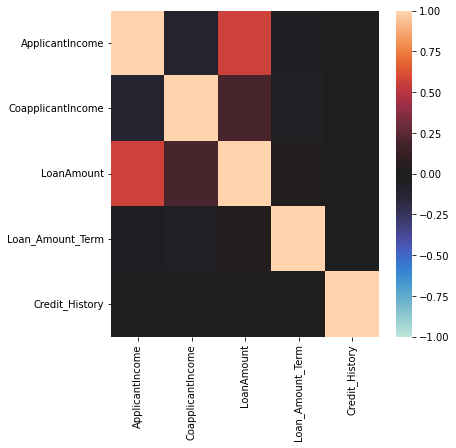

In [ ]:
# melihat korelasi masing-masing fitur numerik melalui heatmap
# semakin terang, maka menurut skala korelasi di heatmap di bawah, korelasi antar fitur semakin tinggi.
# semakin gelap, maka menurut skala korelasi di heatmap di bawah, korelasi antar fitur semakin rendah.
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0)
plt.show()

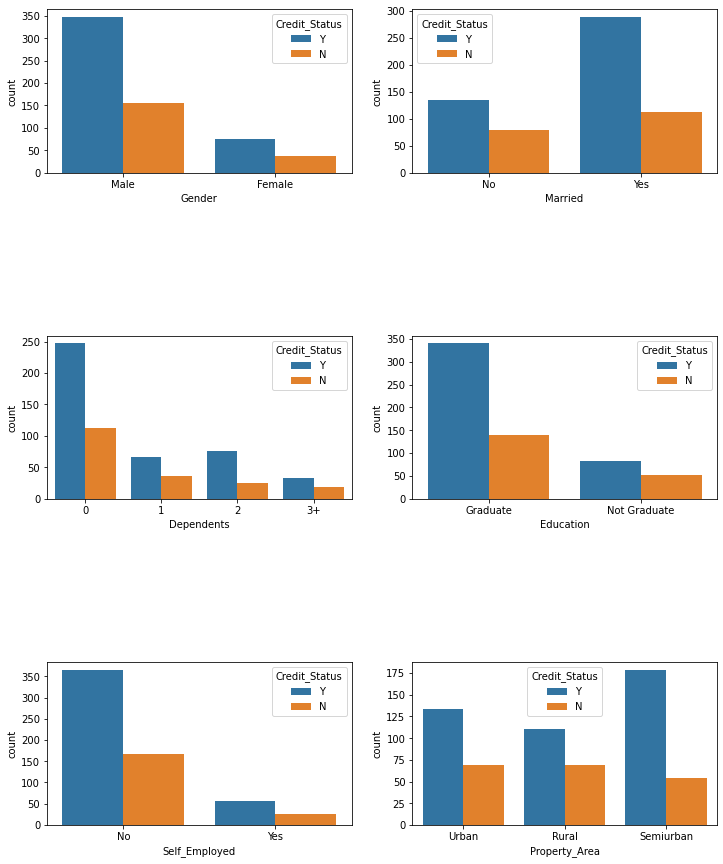

In [ ]:
fig,axes = plt.subplots(3,2,figsize=(12,15))
for idx,cat_col in enumerate(fitur_data_kategorik):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='Credit_Status',ax=axes[row,col])

plt.subplots_adjust(hspace=1)

## Data Preprocessing

In [ ]:
X=df.iloc[:,:-1].values  # Predictor attributes
Y=df.iloc[:,-1].values   # Target attribute

In [ ]:
X.transpose

<function ndarray.transpose>

In [ ]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder=LabelEncoder()
for i in range(0,11):
    X[0:,i]=LabelEncoder.fit_transform(X[0:,i])
X[0:,11]=LabelEncoder.fit_transform(X[0:,11])
Y=LabelEncoder.fit_transform(Y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
X=mm.fit_transform(X)

## Modelling SOM

In [ ]:
import minisom
from minisom import MiniSom
som =MiniSom(x=614 ,y=2 ,input_len=12,
             sigma=1.0 , learning_rate=0.5)
som.random_weights_init(X)

In [ ]:
X = X.astype(float)

In [ ]:
som.train_random(data=X, num_iteration=1000)

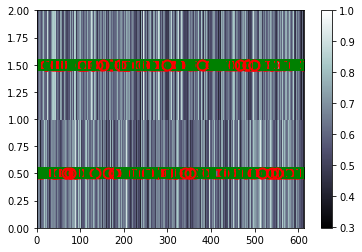

In [ ]:
from pylab import bone,pcolor, colorbar ,plot ,show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors=['r','g']
Y_som=[]
for i,x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5,
         w[1]+0.5,
        markers[Y[i]],
        markeredgecolor = colors[Y[i]],
        markerfacecolor = 'None',
        markersize = 10,
        markeredgewidth = 2)
    Y_som.append(markers[Y[i]])
Y_som=LabelEncoder.fit_transform(Y_som)
show()


## Evaluasi Model SOM

In [ ]:
data = {'Y': Y,
        'Y_SOM': Y_som}

evaluate = pd.DataFrame(data)

In [ ]:
evaluate.head()

,Y,Y_SOM
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1


In [ ]:
b=[]
for i in range(len(Y)):
  if evaluate.Y[i]==evaluate.Y_SOM[i]:
    continue
  elif evaluate.Y[i]!=evaluate.Y_SOM[i]:
    b.append(i)
accuration=(len(Y)-len(b))/len(Y)
print(accuration)

1.0


In [ ]:
array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)'],
      dtype=object)